In [1]:
import matplotlib.pyplot as plt
from ms2pip.ms2pipC import MS2PIP
import os
import re
import pandas as pd
import numpy as np
from scipy.stats import rankdata, scoreatpercentile
from pyteomics import parser, fasta

In [3]:
input_psm_table = r"../pypgatk/Script/ions6.tsv"
non_ions_number = pd.read_table(input_psm_table, header = 0, sep = "\t")

In [4]:
non_ions_number

,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,retention_time,...,opt_global_cv_MS:1002217_decoy_peptide,opt_global_cv_MS:1000889_peptidoform_sequence,target,FDR,q-value,position,SpecFile,ScanNum,USI,annotater_ions_number
0,KCMESSILK,131,pseudo_ENST00000528172.1_2_codon_6,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.067582,"0-UNIMOD:1,2-UNIMOD:4,3-UNIMOD:35",174.50000,...,0,.(Acetyl)KC(Carbamidomethyl)M(Oxidation)ESSILK,1,0.008444,0.008444,non-canonical,MFA384.mzML,389,mzspec:PXD014145:MFA384:scan:389:[UNIMOD:1]KC[...,7
1,GGTKAGQASTLDRK,375,altorf_ENST00000399713.6_2,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,14-UNIMOD:737,314.50000,...,0,GGTKAGQASTLDRK(TMT6plex),1,0.005853,0.005853,non-canonical,MFA381.mzML,867,mzspec:PXD014145:MFA381:scan:867:GGTKAGQASTLDR...,7
2,GLSAANCFSSCHRRNCYSEGYNGQPFNPRK,539,"DECOY_altorf_ENST00000396475.6_2_codon_4,DECOY...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,"0-UNIMOD:737,7-UNIMOD:4,11-UNIMOD:4,16-UNIMOD:4",422.95248,...,1,.(TMT6plex)GLSAANC(Carbamidomethyl)FSSC(Carbam...,0,0.005241,0.005241,non-canonical,MFA384.mzML,1235,mzspec:PXD014145:MFA384:scan:1235:[UNIMOD:737]...,6
3,CELCWAWCRKWPSMRGSCWDSYLGDAK,612,DECOY_altorf_ENST00000507008.5_3_codon_5,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,"0-UNIMOD:737,1-UNIMOD:4,4-UNIMOD:4,8-UNIMOD:4,...",441.49701,...,1,.(TMT6plex)C(Carbamidomethyl)ELC(Carbamidometh...,0,0.005557,0.005557,non-canonical,MFA384.mzML,1326,mzspec:PXD014145:MFA384:scan:1326:[UNIMOD:737]...,6
4,NILSKMRER,891,"ncRNA_ENST00000653654.1_2_codon_39,ncRNA_ENST0...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.069117,"0-UNIMOD:1,5-UNIMOD:737,6-UNIMOD:35",455.90000,...,0,.(Acetyl)NILSK(TMT6plex)M(Oxidation)RER,1,0.006416,0.006416,non-canonical,MFA385.mzML,1404,mzspec:PXD014145:MFA385:scan:1404:[UNIMOD:1]NI...,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,KYNKEYEKCKNHGEVKHLCKYESWFSFCPKRKNCNTK,149039,"DECOY_ncRNA_ENST00000433406.6_1_codon_5,DECOY_...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,"9-UNIMOD:4,19-UNIMOD:4,20-UNIMOD:737,28-UNIMOD...",4834.63716,...,1,KYNKEYEKC(Carbamidomethyl)KNHGEVKHLC(Carbamido...,0,0.005614,0.005614,non-canonical,MFA389.mzML,29658,mzspec:PXD014145:MFA389:scan:29658:KYNKEYEKC[U...,6
473,CWQGMNLWFDMWRMNWKSEQQMHSTSLPPKQTQTKKQK,149841,"DECOY_altorf_ENST00000382199.7_3_codon_6,DECOY...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,"1-UNIMOD:4,17-UNIMOD:737,22-UNIMOD:35,30-UNIMO...",4566.66540,...,1,C(Carbamidomethyl)WQGMNLWFDMWRMNWK(TMT6plex)SE...,0,0.005279,0.005279,non-canonical,MFA390.mzML,27861,mzspec:PXD014145:MFA390:scan:27861:C[UNIMOD:4]...,9
474,KDEFPFALEVQTLPQTCDGPK,149997,ENSEMBL:ENSBTAP00000024146,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,"0-UNIMOD:737,1-UNIMOD:737,17-UNIMOD:4,21-UNIMO...",3667.00000,...,0,.(TMT6plex)K(TMT6plex)DEFPFALEVQTLPQTC(Carbami...,1,0.000379,0.000330,non-canonical,MFA390.mzML,21946,mzspec:PXD014145:MFA390:scan:21946:[UNIMOD:737...,48
475,DWWSNCIQWLYVVHNFKKRNFNWVSYYHYPFAENYENCTK,150116,DECOY_altorf_ENST00000352998.7_1_codon_44,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,"0-UNIMOD:737,6-UNIMOD:4,17-UNIMOD:737,18-UNIMO...",4564.28280,...,1,.(TMT6plex)DWWSNC(Carbamidomethyl)IQWLYVVHNFK(...,0,0.005920,0.005920,non-canonical,MFA391.mzML,27160,mzspec:PXD014145:MFA391:scan:27160:[UNIMOD:737...,6


In [5]:
#Substitution strategy
def replace_mod(s):
    s = s.replace("UNIMOD:4","Carbamidomethyl").replace("UNIMOD:737","TMT6plex").replace("UNIMOD:35","Oxidation").replace("UNIMOD:1","Acetyl").replace("-","|").replace(",","|")
    return s
def get_nativeID(s):
#     return s.split(" ")[-1]
    return s.split(":")[1]
#     return int(s.split("=")[-1])-1
non_ions_number.loc[:,"modifications"] = non_ions_number.apply(lambda x : replace_mod(x["modifications"]) if type(x["modifications"])==str else "-", axis = 1)
non_ions_number.loc[:,"spec_id"] = non_ions_number.apply(lambda x : get_nativeID(x["spectra_ref"]), axis = 1)
# validate_out.loc[:,"spec_id"] = non_ions_number.apply(lambda x : x["PSM_ID"], axis = 1)

In [6]:
non_ions_number

,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,retention_time,...,opt_global_cv_MS:1000889_peptidoform_sequence,target,FDR,q-value,position,SpecFile,ScanNum,USI,annotater_ions_number,spec_id
0,KCMESSILK,131,pseudo_ENST00000528172.1_2_codon_6,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.067582,0|Acetyl|2|Carbamidomethyl|3|Oxidation,174.50000,...,.(Acetyl)KC(Carbamidomethyl)M(Oxidation)ESSILK,1,0.008444,0.008444,non-canonical,MFA384.mzML,389,mzspec:PXD014145:MFA384:scan:389:[UNIMOD:1]KC[...,7,controllerType=0 controllerNumber=1 scan=389
1,GGTKAGQASTLDRK,375,altorf_ENST00000399713.6_2,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,14|TMT6plex,314.50000,...,GGTKAGQASTLDRK(TMT6plex),1,0.005853,0.005853,non-canonical,MFA381.mzML,867,mzspec:PXD014145:MFA381:scan:867:GGTKAGQASTLDR...,7,controllerType=0 controllerNumber=1 scan=867
2,GLSAANCFSSCHRRNCYSEGYNGQPFNPRK,539,"DECOY_altorf_ENST00000396475.6_2_codon_4,DECOY...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|7|Carbamidomethyl|11|Carbamidomethy...,422.95248,...,.(TMT6plex)GLSAANC(Carbamidomethyl)FSSC(Carbam...,0,0.005241,0.005241,non-canonical,MFA384.mzML,1235,mzspec:PXD014145:MFA384:scan:1235:[UNIMOD:737]...,6,controllerType=0 controllerNumber=1 scan=1235
3,CELCWAWCRKWPSMRGSCWDSYLGDAK,612,DECOY_altorf_ENST00000507008.5_3_codon_5,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|1|Carbamidomethyl|4|Carbamidomethyl...,441.49701,...,.(TMT6plex)C(Carbamidomethyl)ELC(Carbamidometh...,0,0.005557,0.005557,non-canonical,MFA384.mzML,1326,mzspec:PXD014145:MFA384:scan:1326:[UNIMOD:737]...,6,controllerType=0 controllerNumber=1 scan=1326
4,NILSKMRER,891,"ncRNA_ENST00000653654.1_2_codon_39,ncRNA_ENST0...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.069117,0|Acetyl|5|TMT6plex|6|Oxidation,455.90000,...,.(Acetyl)NILSK(TMT6plex)M(Oxidation)RER,1,0.006416,0.006416,non-canonical,MFA385.mzML,1404,mzspec:PXD014145:MFA385:scan:1404:[UNIMOD:1]NI...,19,controllerType=0 controllerNumber=1 scan=1404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,KYNKEYEKCKNHGEVKHLCKYESWFSFCPKRKNCNTK,149039,"DECOY_ncRNA_ENST00000433406.6_1_codon_5,DECOY_...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,9|Carbamidomethyl|19|Carbamidomethyl|20|TMT6pl...,4834.63716,...,KYNKEYEKC(Carbamidomethyl)KNHGEVKHLC(Carbamido...,0,0.005614,0.005614,non-canonical,MFA389.mzML,29658,mzspec:PXD014145:MFA389:scan:29658:KYNKEYEKC[U...,6,controllerType=0 controllerNumber=1 scan=29658
473,CWQGMNLWFDMWRMNWKSEQQMHSTSLPPKQTQTKKQK,149841,"DECOY_altorf_ENST00000382199.7_3_codon_6,DECOY...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,1|Carbamidomethyl|17|TMT6plex|22|Oxidation|30|...,4566.66540,...,C(Carbamidomethyl)WQGMNLWFDMWRMNWK(TMT6plex)SE...,0,0.005279,0.005279,non-canonical,MFA390.mzML,27861,mzspec:PXD014145:MFA390:scan:27861:C[UNIMOD:4]...,9,controllerType=0 controllerNumber=1 scan=27861
474,KDEFPFALEVQTLPQTCDGPK,149997,ENSEMBL:ENSBTAP00000024146,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,0|TMT6plex|1|TMT6plex|17|Carbamidomethyl|21|TM...,3667.00000,...,.(TMT6plex)K(TMT6plex)DEFPFALEVQTLPQTC(Carbami...,1,0.000379,0.000330,non-canonical,MFA390.mzML,21946,mzspec:PXD014145:MFA390:scan:21946:[UNIMOD:737...,48,controllerType=0 controllerNumber=1 scan=21946
475,DWWSNCIQWLYVVHNFKKRNFNWVSYYHYPFAENYENCTK,150116,DECOY_altorf_ENST00000352998.7_1_codon_44,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|6|Carbamidomethyl|17|TMT6plex|18|TM...,4564.28280,...,.(TMT6plex)DWWSNC(Carbami

In [7]:
for i in range(380,392):
    non_peprec = non_ions_number[non_ions_number["SpecFile"]=="MFA"+str(i)+".mzML"]
    non_peprec = non_peprec[['spec_id', 'sequence', 'modifications',  'charge','retention_time', 'calc_mass_to_charge','search_engine_score[1]']].rename(columns={'sequence': 'peptide', 'retention_time': 'rt', 'calc_mass_to_charge': 'mz','search_engine_score[1]': 'score'})
    non_peprec.to_csv('/mnt/nfs/wangd/ms2pip/PEPREC/ions6-HCD2021/non/'+str(i)+ '_non.peprec', sep=' ', index=False)

In [8]:
params = {
     "ms2pip": {
         "ptm": [
             "Carbamidomethyl,57.021464,opt,C",
             "TMT6plex,229.162932,opt,K",
             "TMT6plex,229.162932,opt,N-term",
             "Oxidation,15.994915,opt,M",
             "Acetyl,42.010565,opt,N-term",
         ],
         "model": "HCD2021",
         "frag_method": "HCD",
         "frag_error": 0.01,
         "out": "csv",
         "sptm": [], "gptm": [],
     }
}

In [9]:
for i in range(380,392):
    ms2pip = MS2PIP("/mnt/nfs/wangd/ms2pip/PEPREC/ions6-HCD2021/non/"+str(i)+"_non.peprec", spec_file="/mnt/nfs/wangd/project/PXD014145/MFA"+str(i)+".mzML",params=params, num_cpu=48, compute_correlations=True, model_dir = "/mnt/nfs/wangd/ms2pip/model/",output_filename="/mnt/nfs/wangd/ms2pip/PEPREC/ions6-HCD2021/non/"+str(i)+"non")
    ms2pip.run()

In [10]:
results_non = []
for i in range(380,392):
    r = pd.read_csv("/mnt/nfs/wangd/ms2pip/PEPREC/ions6-HCD2021/non/"+str(i)+"non_correlations.csv", index_col=0)
    r['percentile'] = rankdata(r.pearsonr) / r.shape[0]
    results_non.append(r)
result_non = pd.concat(results_non)

In [11]:
df_non = pd.merge(non_ions_number, result_non, on='spec_id')

In [12]:
df_non

,sequence,PSM_ID,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,retention_time,...,q-value,position,SpecFile,ScanNum,USI,annotater_ions_number,spec_id,ion,pearsonr,percentile
0,KCMESSILK,131,pseudo_ENST00000528172.1_2_codon_6,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.067582,0|Acetyl|2|Carbamidomethyl|3|Oxidation,174.50000,...,0.008444,non-canonical,MFA384.mzML,389,mzspec:PXD014145:MFA384:scan:389:[UNIMOD:1]KC[...,7,controllerType=0 controllerNumber=1 scan=389,B,NaN,0.500000
1,KCMESSILK,131,pseudo_ENST00000528172.1_2_codon_6,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.067582,0|Acetyl|2|Carbamidomethyl|3|Oxidation,174.50000,...,0.008444,non-canonical,MFA384.mzML,389,mzspec:PXD014145:MFA384:scan:389:[UNIMOD:1]KC[...,7,controllerType=0 controllerNumber=1 scan=389,Y,-0.311188,0.035714
2,GGTKAGQASTLDRK,375,altorf_ENST00000399713.6_2,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,14|TMT6plex,314.50000,...,0.005853,non-canonical,MFA381.mzML,867,mzspec:PXD014145:MFA381:scan:867:GGTKAGQASTLDR...,7,controllerType=0 controllerNumber=1 scan=867,B,NaN,0.728261
3,GGTKAGQASTLDRK,375,altorf_ENST00000399713.6_2,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,14|TMT6plex,314.50000,...,0.005853,non-canonical,MFA381.mzML,867,mzspec:PXD014145:MFA381:scan:867:GGTKAGQASTLDR...,7,controllerType=0 controllerNumber=1 scan=867,Y,NaN,0.739130
4,GLSAANCFSSCHRRNCYSEGYNGQPFNPRK,539,"DECOY_altorf_ENST00000396475.6_2_codon_4,DECOY...",0,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|7|Carbamidomethyl|11|Carbamidomethy...,422.95248,...,0.005241,non-canonical,MFA384.mzML,1235,mzspec:PXD014145:MFA384:scan:1235:[UNIMOD:737]...,6,controllerType=0 controllerNumber=1 scan=1235,B,NaN,0.660714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,KDEFPFALEVQTLPQTCDGPK,149997,ENSEMBL:ENSBTAP00000024146,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.000018,0|TMT6plex|1|TMT6plex|17|Carbamidomethyl|21|TM...,3667.00000,...,0.000330,non-canonical,MFA390.mzML,21946,mzspec:PXD014145:MFA390:scan:21946:[UNIMOD:737...,48,controllerType=0 controllerNumber=1 scan=21946,Y,0.812243,0.603774
982,DWWSNCIQWLYVVHNFKKRNFNWVSYYHYPFAENYENCTK,150116,DECOY_altorf_ENST00000352998.7_1_codon_44,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|6|Carbamidomethyl|17|TMT6plex|18|TM...,4564.28280,...,0.005920,non-canonical,MFA391.mzML,27160,mzspec:PXD014145:MFA391:scan:27160:[UNIMOD:737...,6,controllerType=0 controllerNumber=1 scan=27160,B,NaN,0.939394
983,DWWSNCIQWLYVVHNFKKRNFNWVSYYHYPFAENYENCTK,150116,DECOY_altorf_ENST00000352998.7_1_codon_44,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|6|Carbamidomethyl|17|TMT6plex|18|TM...,4564.28280,...,0.005920,non-canonical,MFA391.mzML,27160,mzspec:PXD014145:MFA391:scan:27160:[UNIMOD:737...,6,controllerType=0 controllerNumber=1 scan=27160,Y,NaN,0.924242
984,DWWSNCIQWLYVVHNFKKRNFNWVSYYHYPFAENYENCTK,150117,DECOY_altorf_ENST00000352998.7_1_codon_44,1,PXD014145-A549-complete_decoy,NaN,"[, , OpenMS/ConsensusID_best, 3.0.0-pre-nightl...",0.072869,0|TMT6plex|6|Carbamidomethyl|17|TMT6plex|18|TM...,4691.49660,...,0.005872,non-canonical,MFA391.mzML,27977,mzspec:PXD014145:MFA391:scan:27977:[UNIMOD:737...,7,controllerType=0 controllerNumber=1 scan=27977,B,NaN,0.984848


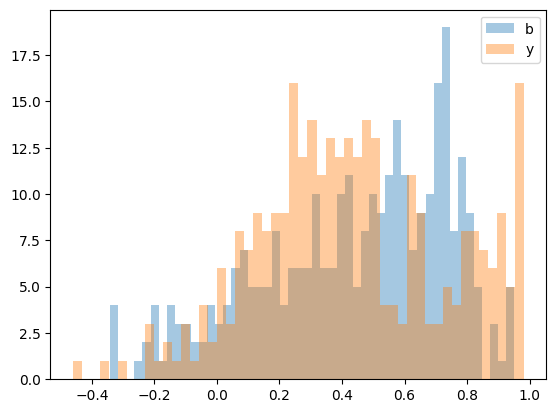

In [13]:
plt.hist(df_non.loc[df_non.ion == 'B', 'pearsonr'], bins=50, alpha=0.4, label='b')
plt.hist(df_non.loc[df_non.ion == 'Y', 'pearsonr'], bins=50, alpha=0.4, label='y')
plt.legend()

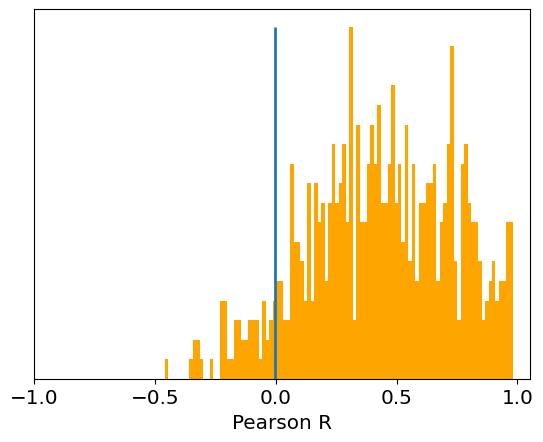

In [14]:
y, x, _ = plt.hist(df_non['pearsonr'], bins=100, color='orange')
plt.vlines(scoreatpercentile(df_non['pearsonr'], 5), 0, y.max(), lw=2)
plt.xlabel('Pearson R', fontsize='x-large')
plt.xticks(np.linspace(-1, 1, 5), fontsize='x-large')
plt.gca().get_yaxis().set_visible(False)

plt.savefig('/mnt/nfs/wangd/ms2pip/PEPREC/ions6-HCD2021/non/non_pearsonr_hist.svg')